In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic_df=pd.read_csv("train.csv")
titanic_df.shape

(891, 12)

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

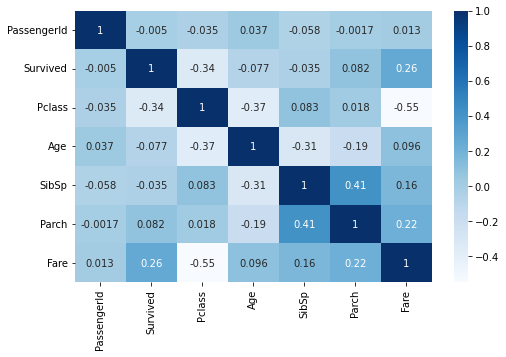

In [8]:
plt.figure(figsize= (8,5))
sns.heatmap(titanic_df.corr(), annot=True, cmap='Blues')

In [9]:
titanic_df['Survived'].value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

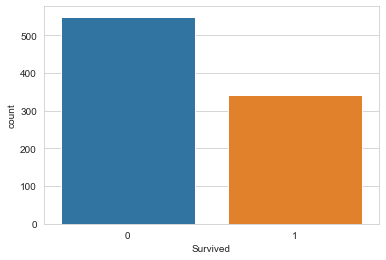

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

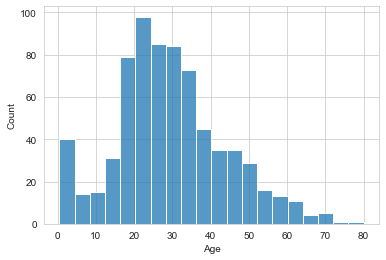

In [11]:
sns.histplot(titanic_df['Age'].dropna())

<AxesSubplot:xlabel='Survived', ylabel='count'>

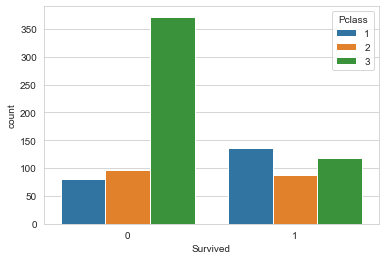

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)

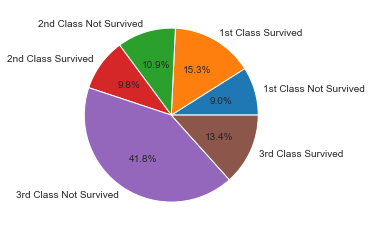

In [14]:
survived_by_class = titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()
fig, ax = plt.subplots()
labels = ['1st Class Not Survived', '1st Class Survived', '2nd Class Not Survived', '2nd Class Survived', '3rd Class Not Survived', '3rd Class Survived']
ax.pie(survived_by_class.values.flatten(), labels=labels, autopct='%1.1f%%')
plt.show()

In [15]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

<AxesSubplot:xlabel='Age'>

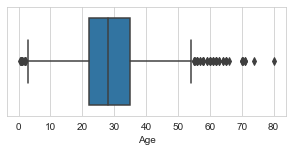

In [16]:
plt.figure(figsize= (5,2))
sns.boxplot(titanic_df['Age'])

In [17]:
Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

22.0
35.0
13.0


In [18]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.5 54.5


In [19]:
titanic_df = titanic_df[titanic_df['Age']< Upper_Whisker]

<AxesSubplot:xlabel='Fare'>

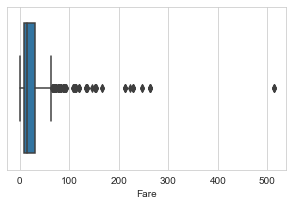

In [20]:
plt.figure(figsize= (5,3))
sns.boxplot(titanic_df['Fare'])

In [21]:
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

7.8958
30.5
22.6042


In [22]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-26.0105 64.4063


In [23]:
titanic_df = titanic_df[titanic_df['Fare']< Upper_Whisker]

In [24]:
titanic_df.shape

(741, 12)

In [25]:
data=titanic_df.drop(['Name', 'Ticket','Cabin'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'].astype(str))


In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,28.0,0,0,8.4583,1


In [28]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [29]:
data["Embarked"].value_counts()

2    559
0    110
1     72
Name: Embarked, dtype: int64

In [30]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [33]:
x_train.shape,x_test.shape

((592, 8), (149, 8))

In [34]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [35]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
466,467,2,1,28.0,0,0,0.0000,2
559,560,3,0,36.0,1,0,17.4000,2
164,165,3,1,1.0,4,1,39.6875,2
74,75,3,1,32.0,0,0,56.4958,2
766,767,1,1,28.0,0,0,39.6000,0


In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=6)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_train)
pred2 = dtc.predict(x_test)

In [49]:
accuracy_score(y_train,pred1)

0.875

In [50]:
accuracy_score(y_test,pred2)

0.785234899328859

[Text(482.7794117647059, 302.86285714285714, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 592\nvalue = [395, 197]'),
 Text(229.76470588235296, 256.2685714285715, 'X[1] <= 2.5\nentropy = 0.925\nsamples = 182\nvalue = [62, 120]'),
 Text(109.41176470588235, 209.67428571428573, 'X[0] <= 373.0\nentropy = 0.406\nsamples = 74\nvalue = [6, 68]'),
 Text(65.64705882352942, 163.08, 'X[0] <= 343.0\nentropy = 0.663\nsamples = 29\nvalue = [5, 24]'),
 Text(43.76470588235294, 116.4857142857143, 'X[3] <= 23.0\nentropy = 0.592\nsamples = 28\nvalue = [4, 24]'),
 Text(21.88235294117647, 69.89142857142855, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(65.64705882352942, 69.89142857142855, 'X[3] <= 27.5\nentropy = 0.702\nsamples = 21\nvalue = [4, 17]'),
 Text(43.76470588235294, 23.297142857142887, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(87.52941176470588, 23.297142857142887, 'entropy = 0.323\nsamples = 17\nvalue = [1, 16]'),
 Text(87.52941176470588, 116.4857142857143, 'entropy = 0.0\nsampl

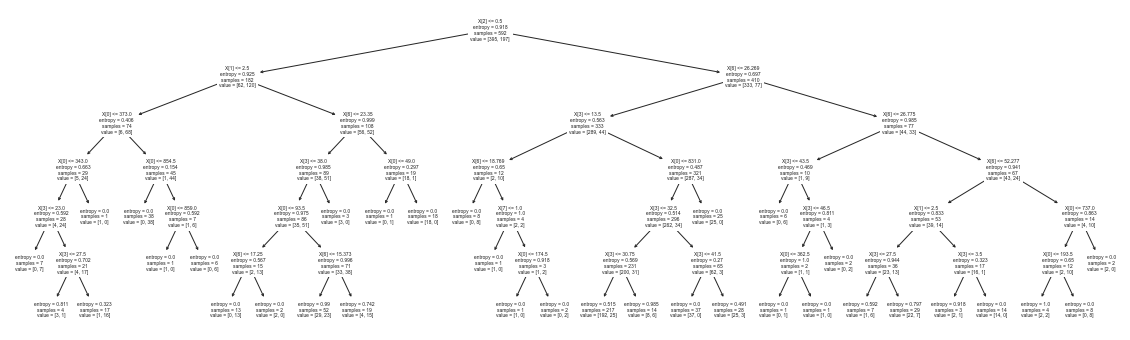

In [52]:
plt.figure(figsize = (20,6))
from sklearn import tree
tree.plot_tree(dtc.fit(x_train, y_train))